## Kapittel 15: Objektorientert programmering 
### 15.5.1

In [7]:
class Fall:
    def __init__(self, m, g):
        self.m = m
        self.g = g
        
    def akselerasjon(self):
        a = self.g
        return a
    
    def kraft(self):
        F = self.m * self.g
        return F
    
# Eksempel på bruk av klassen for en ball med masse 2.0 kg
ball = Fall(2.0,9.8)
print(ball.kraft())

19.6


### 15.5.2

In [39]:
class Grunnstoff:
    def __init__(self,a_num,sym,masse,el_neg): 
        # atomnummer
        self.a_num = a_num 
        # symbol
        self.sym = sym
        # masse i g/mol
        self.masse = masse
        # elektronegativitet
        self.el_neg = el_neg
        
    def hent_informasjon(self):
        print("Symbol:", self.sym, "| atomnummer:", self.a_num, 
              "| masse:", self.masse,"| elektronegativitet:", self.el_neg)
        
    def periode(self):
        if self.a_num <= 2:
            periode = 1
        elif self.a_num <= 10:
            periode = 2
        elif self.a_num <= 18:
            periode = 3
        elif self.a_num <= 36:
            periode = 4
        elif self.a_num <= 54:
            periode = 5
        elif self.a_num <= 86:
            periode = 6
        elif self.a_num <= 118:
            periode = 7
        return periode
    
# Eksempel på bruk
hydrogen = Grunnstoff(1,'H',1.008, 2.1)
karbon = Grunnstoff(6, 'C', 12.0, 2.5)

hydrogen.hent_informasjon()
print("Perioden til karbon er:", karbon.periode())

Symbol: H | atomnummer: 1 | masse: 1.008 | elektronegativitet: 2.1
Perioden til karbon er: 2


### 15.5.3

Programmet nedenfor er en enkel løsning. Du kan eventuelt legge inn sortering etter atomnummer i periodesystemet, og du kan systematisere ved hjelp av dictionaries med atomnummer som nøkler. Dessuten kan det være fint med litt feilhåndtering slik at brukeren får en feilmedling dersom grunnstoffet ikke finnes i periodesystemet.

In [42]:
class Periodesystem:
    def __init__(self):
        self.grunnstoffer = []
    def legg_til_grunnstoff(self, objekt):
        self.grunnstoffer.append(objekt)
    def hent_grunnstoff(self, grunnstoff):
        for stoff in self.grunnstoffer:
            if stoff == grunnstoff:
                return stoff
    
periodesystemet = Periodesystem()             # Lager et periodesystem
periodesystemet.legg_til_grunnstoff(hydrogen) # Legger til et grunnstoff i periodesystemet
periodesystemet.legg_til_grunnstoff(karbon)
H = periodesystemet.hent_grunnstoff(hydrogen) # Henter grunnstoffet igjen
H.hent_informasjon()                          # Skriver ut informasjon om grunnstoffet

Symbol: H | atomnummer: 1 | masse: 1.008 | elektronegativitet: 2.1


### 15.5.7
a)

In [47]:
class Ball:
    def __init__(self,m):
        self.g = 9.81
        self.m = m
    def akselerasjon(self):
        return self.g
    
ball = Ball(2)
print(ball.akselerasjon())

9.81


Vi ser at akselerasjonen er uavhengig av massen, så dette programmet stemmer. La oss utvide det:

b), c), d)


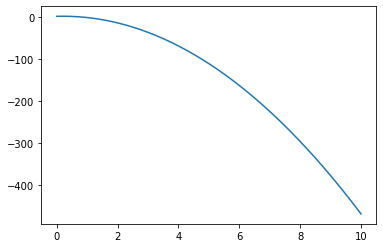

In [58]:
import matplotlib.pyplot as plt
import numpy as np

class Ball:
    def __init__(self,m):
        self.g = -9.81
        self.m = m
        
    def akselerasjon(self):
        self.a = self.g
        return self.a
    
    def sett_initalbetingelse(self,x,v):
        self.x = x
        self.v = v
        
    def integrer(self, T, dt):
        N = int(T/dt)+1
        self.t = np.zeros(N)
        self.s = np.zeros(N)
        v = np.zeros(N)
        self.s[0] = self.x
        v[0] = self.v
        for i in range(N-1):
            v[i+1] = v[i] + self.a*dt
            self.s[i+1] = self.s[i] + v[i]*dt + 0.5*self.a*dt**2
            self.t[i+1] = self.t[i] + dt
        return self.t, self.s
    
    def plott_posisjon(self):
        plt.plot(self.t,self.s)
        plt.show()
    
ball = Ball(2)
ball.sett_initalbetingelse(1,2)
ball.akselerasjon()
ball.integrer(10,1E-5)
ball.plott_posisjon()